In [1]:
import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [3]:
datagen = ImageDataGenerator()

In [5]:
class_names = ['Beagle', 'Boxer','Bulldog','Dachshund','German_Shepherd','Golden_Retriever','Labrador_Retriever','Poodle','Rottweiler','Yorkshire_Terrier']

In [7]:
train_generator = datagen.flow_from_directory( 
    directory="C:/Users/dsrag/OneDrive/Documents/Project/Project_Breed/dataset", 
    classes = class_names,
    target_size=(224, 224),  
    batch_size=32, 
    class_mode="categorical", 
)

Found 967 images belonging to 10 classes.


In [9]:
valid_generator = datagen.flow_from_directory( 
    directory="C:/Users/dsrag/OneDrive/Documents/Project/Project_Breed/dataset", 
    classes = class_names,
    target_size=(224, 224), 
    batch_size=32, 
    class_mode="categorical", 
)

Found 967 images belonging to 10 classes.


In [11]:
test_generator = datagen.flow_from_directory( 
    directory="C:/Users/dsrag/OneDrive/Documents/Project/Project_Breed/dataset", 
    classes = class_names,
    target_size=(224, 224), 
    batch_size=32, 
    class_mode="categorical", 
)

Found 967 images belonging to 10 classes.


In [13]:
resnet_50 = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))
for layer in resnet_50.layers:
    layer.trainable = False

In [17]:
x = resnet_50.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(10, activation='softmax')(x)
model = Model(inputs = resnet_50.input, outputs = predictions)

In [19]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

def trainModel(model, epochs, optimizer):
    batch_size = 32
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    checkpoint = ModelCheckpoint(
            "model_weights.keras",  # Adjust filepath to end with '.keras'
            monitor='val_accuracy',
            verbose=1,
            save_best_only=True,
            mode='max'
        )
    callbacks_list = [checkpoint]
    return model.fit(train_generator, validation_data=valid_generator, epochs=epochs, batch_size=batch_size, callbacks=callbacks_list)

In [21]:
model_history = trainModel(model = model, epochs = 30, optimizer = "Adam")

Epoch 1/30


C:\Users\dsrag\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 805ms/step - accuracy: 0.1006 - loss: 0.7243
Epoch 1: val_accuracy improved from -inf to 0.15926, saving model to model_weights.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.1007 - loss: 0.7203 - val_accuracy: 0.1593 - val_loss: 0.4576
Epoch 2/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 843ms/step - accuracy: 0.1000 - loss: 0.4320
Epoch 2: val_accuracy improved from 0.15926 to 0.18201, saving model to model_weights.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.1004 - loss: 0.4317 - val_accuracy: 0.1820 - val_loss: 0.4023
Epoch 3/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 764ms/step - accuracy: 0.1232 - loss: 0.3988
Epoch 3: val_accuracy improved from 0.18201 to 0.22234, saving model to model_weights.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.1233 - loss: 0.3987 - val_accuracy: 0.2223 - val_loss: 0.3878
Epoch 4/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 780ms/step - accuracy: 0.1467 - loss: 0.3821
Epoch 4: val_accuracy improved from 0.22234 to 0.

In [22]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save("model6.h5")

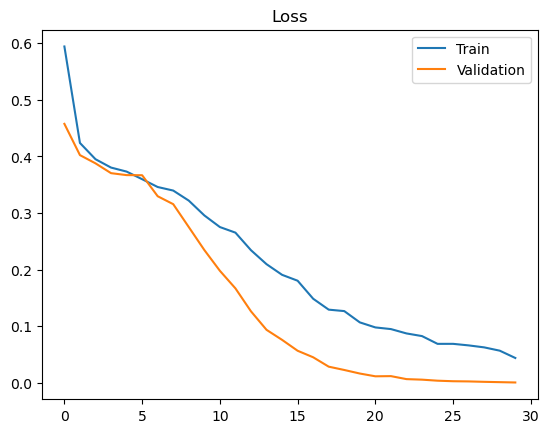

In [25]:
loss_train_curve = model_history.history["loss"]
loss_val_curve = model_history.history["val_loss"]
plt.plot(loss_train_curve, label = "Train")
plt.plot(loss_val_curve, label = "Validation")
plt.legend(loc = 'upper right')
plt.title("Loss")
plt.show()

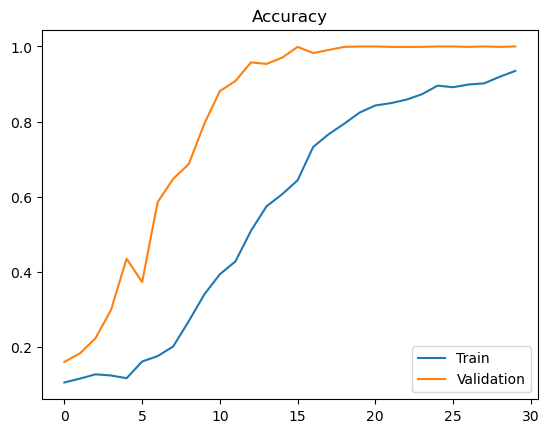

In [27]:
acc_train_curve = model_history.history["accuracy"]
acc_val_curve = model_history.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Train")
plt.plot(acc_val_curve, label = "Validation")
plt.legend(loc = 'lower right')
plt.title("Accuracy")
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print("The test loss is: ", test_loss)
print("The best accuracy is: ", test_acc*100)

12/31 ━━━━━━━━━━━━━━━━━━━━ 14s 763ms/step - accuracy: 1.0000 - loss: 7.6340e-04

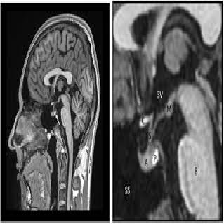

In [96]:
img = tf.keras.preprocessing.image.load_img('test6.jpg', target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.array([img_array]) 
img

In [98]:
# generate predictions for samples
predictions = model.predict(img_array)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
[[2.3488139e-11 6.8009115e-08 9.9999988e-01 5.3464221e-12]]


In [100]:
import numpy as np

class_names = ['glioma', 'meningioma','notumor','pituitary']

predicted_index = np.argmax(predictions)

predicted_class = class_names[predicted_index]

print(f"Predicted class: {predicted_class}")

Predicted class: notumor
